<a href="https://colab.research.google.com/github/mdimranh/BPL-Match-Winner-Prediction/blob/main/match_type_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mount Drive**

In [72]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [73]:
import pandas as pd
import numpy as np

In [74]:
bpl = pd.read_csv('gdrive/My Drive/bpl_dataset/bpl.csv')

**Show Dataset**

In [75]:
bpl.head()

,Team,Toss_win,Toss_result,Toss_decission,Player_of_match,Player_of_match_team,Ground,Player_of_match_type,Score,Winner,Result,Weather
0,Barisal,Barisal,Win,bowl,Chris Gayle,Barisal,Dhaka,batsman,167,Barisal,Win,Haze
1,Sylhet,Barisal,Loss,bat,Chris Gayle,Barisal,Dhaka,batsman,165,Barisal,Loss,Haze
2,Chittagong,Chittagong,Win,bat,Dwayne Bravo,Chittagong,Dhaka,all,206,Chittagong,Win,Passing clouds
3,Rajshahi,Chittagong,Loss,bowl,Dwayne Bravo,Chittagong,Dhaka,all,153,Chittagong,Loss,Passing clouds
4,Dhaka,Khulna,Loss,bat,Andre Russell,Khulna,Dhaka,all,156,Khulna,Loss,Haze


**Show shape**

In [76]:
bpl.shape

(590, 12)

**Show All Information**

In [77]:
bpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Team                  590 non-null    object
 1   Toss_win              590 non-null    object
 2   Toss_result           590 non-null    object
 3   Toss_decission        590 non-null    object
 4   Player_of_match       590 non-null    object
 5   Player_of_match_team  590 non-null    object
 6   Ground                590 non-null    object
 7   Player_of_match_type  590 non-null    object
 8   Score                 590 non-null    int64 
 9   Winner                590 non-null    object
 10  Result                590 non-null    object
 11  Weather               590 non-null    object
dtypes: int64(1), object(11)
memory usage: 55.4+ KB


**Show Null Value**

In [78]:
bpl.isnull().any()

Team                    False
Toss_win                False
Toss_result             False
Toss_decission          False
Player_of_match         False
Player_of_match_team    False
Ground                  False
Player_of_match_type    False
Score                   False
Winner                  False
Result                  False
Weather                 False
dtype: bool

#**Import library for data visualization**

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

**Define a function to see the graph**

In [80]:
def bar_chart(feature):
    low = bpl[bpl['Score'] <= 120][feature].value_counts()
    mid = bpl[(bpl['Score']>=121) & (bpl['Score'] <= 150)][feature].value_counts()
    high = bpl[bpl['Score']>150][feature].value_counts()
    df = pd.DataFrame([low,mid,high])
    df.index = ['Low','Mid','High']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

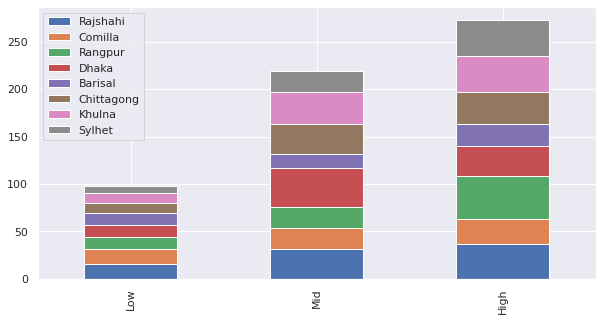

In [81]:
bar_chart('Toss_win')

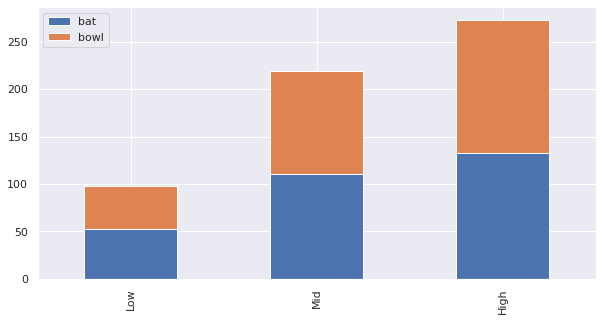

In [82]:
bar_chart('Toss_decission')

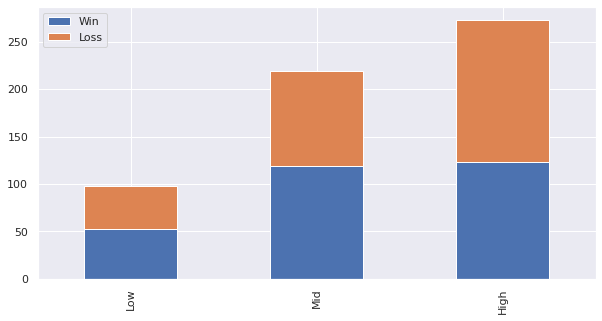

In [83]:
bar_chart('Toss_result')

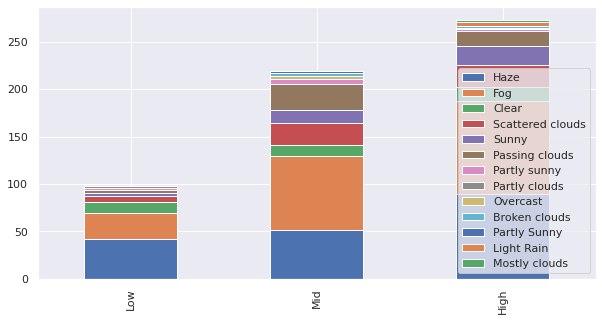

In [84]:
bar_chart('Weather')

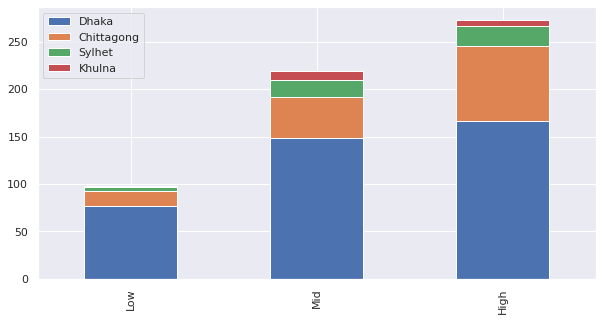

In [85]:
bar_chart('Ground')

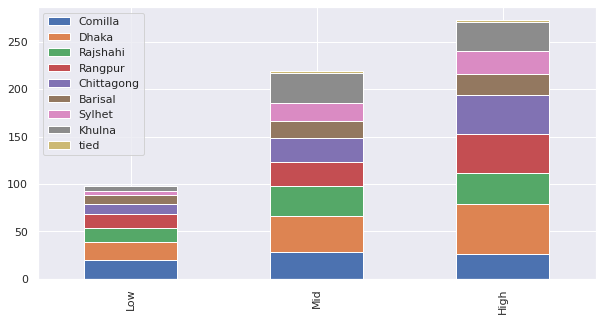

In [86]:
bar_chart('Player_of_match_team')

#**Data Mapping from string to number**

In [87]:
bpl['Player_of_match_team'].value_counts()

Dhaka         110
Rajshahi       80
Rangpur        80
Chittagong     78
Comilla        74
Khulna         68
Sylhet         48
Barisal        48
tied            4
Name: Player_of_match_team, dtype: int64

In [88]:
bpl['Player_of_match_team'].value_counts()

Dhaka         110
Rajshahi       80
Rangpur        80
Chittagong     78
Comilla        74
Khulna         68
Sylhet         48
Barisal        48
tied            4
Name: Player_of_match_team, dtype: int64

In [89]:
bpl_test_data = [bpl]

In [90]:
result_mapping = {"Win": 1, "Loss": 0 }
toss_decission_mapping = {"bowl": 0, "bat": 1}
ground_mapping = {"Dhaka": 0, "Chittagong": 1, "Sylhet": 2, "Khulna": 3}
pom_type_mapping = {"batsman": 0, "bowler": 1, "all": 2}
weather_mapping = {"Fog": 0, "Haze": 1, "Scattered clouds": 2, "Passing clouds": 2, "Clear": 2, "Clear": 2, "Sunny": 2, "Partly sunny": 2, "Partly clouds": 2, "Broken clouds": 2, "Light Rain": 2, "Overcast": 2, "Mostly clouds": 2, "Partly Sunny": 2}
Team_mapping  = {"Dhaka": 0, "Chittagong": 1, "Rajshahi": 2, "Rangpur": 3, "Khulna": 4, "Sylhet": 5, "Comilla": 6, "Barisal": 7, "tied": 8}

In [91]:
for dataset in bpl_test_data:
  dataset['Result'] = dataset['Result'].map(result_mapping)
  dataset['Toss_result'] = dataset['Toss_result'].map(result_mapping)
  dataset['Toss_decission'] = dataset['Toss_decission'].map(toss_decission_mapping)
  dataset['Ground'] = dataset['Ground'].map(ground_mapping)
  dataset['Player_of_match_type'] = dataset['Player_of_match_type'].map(pom_type_mapping)
  dataset['Weather'] = dataset['Weather'].map(weather_mapping)
  dataset['Team'] = dataset['Team'].map(Team_mapping)
  dataset['Toss_win'] = dataset['Toss_win'].map(Team_mapping)
  dataset['Player_of_match_team'] = dataset['Player_of_match_team'].map(Team_mapping)
  dataset['Winner'] = dataset['Winner'].map(Team_mapping)

In [92]:
bpl.head()

,Team,Toss_win,Toss_result,Toss_decission,Player_of_match,Player_of_match_team,Ground,Player_of_match_type,Score,Winner,Result,Weather
0,7,7,1,0,Chris Gayle,7,0,0,167,7,1,1
1,5,7,0,1,Chris Gayle,7,0,0,165,7,0,1
2,1,1,1,1,Dwayne Bravo,1,0,2,206,1,1,2
3,2,1,0,0,Dwayne Bravo,1,0,2,153,1,0,2
4,0,4,0,1,Andre Russell,4,0,2,156,4,0,1


**Score data mapping using function**

In [93]:
def score(Score):
  if Score < 121 :
    return 0
  elif Score > 120 and Score <161:
    return 1
  else:
    return 2

In [94]:
for dataset in bpl_test_data:
  dataset['Score'] = bpl['Score'].map(score)

In [95]:
bpl.head()

,Team,Toss_win,Toss_result,Toss_decission,Player_of_match,Player_of_match_team,Ground,Player_of_match_type,Score,Winner,Result,Weather
0,7,7,1,0,Chris Gayle,7,0,0,2,7,1,1
1,5,7,0,1,Chris Gayle,7,0,0,2,7,0,1
2,1,1,1,1,Dwayne Bravo,1,0,2,2,1,1,2
3,2,1,0,0,Dwayne Bravo,1,0,2,1,1,0,2
4,0,4,0,1,Andre Russell,4,0,2,1,4,0,1


**Player_of_match data mapping using function**

In [96]:
bpl['Player_of_match'].value_counts()

Shakib Al Hasan          18
Shahid Afridi            14
Ravi Bopara              14
Chris Gayle              14
Evin Lewis               12
                         ..
Charles Coventry          2
Nazmul Hossain Shanto     2
Shuvagata Hom             2
Hamilton Masakadza        2
Hamid Hassan              2
Name: Player_of_match, Length: 134, dtype: int64

In [97]:
def pom(pom):
  if pom == "Shakib Al Hasan":
    return 0
  elif pom == "Ravi Bopara":
    return 1
  elif pom == "Chris Gayle":
    return 2
  elif pom == "Shahid Afridi":
    return 3
  elif pom == "Mahmudullah":
    return 4
  else:
    return 5

In [98]:
for dataset in bpl_test_data:
  dataset['Player_of_match'] = bpl['Player_of_match'].map(pom)

In [99]:
bpl.head()

,Team,Toss_win,Toss_result,Toss_decission,Player_of_match,Player_of_match_team,Ground,Player_of_match_type,Score,Winner,Result,Weather
0,7,7,1,0,2,7,0,0,2,7,1,1
1,5,7,0,1,2,7,0,0,2,7,0,1
2,1,1,1,1,5,1,0,2,2,1,1,2
3,2,1,0,0,5,1,0,2,1,1,0,2
4,0,4,0,1,5,4,0,2,1,4,0,1


In [100]:
bpl['Player_of_match_team'].isnull().sum()

0

#**Data Visualization**

In [101]:
def bar_chart(feature):
    low = bpl[bpl['Score'] == 0][feature].value_counts()
    mid = bpl[bpl['Score'] == 1][feature].value_counts()
    high = bpl[bpl['Score'] == 2][feature].value_counts()
    df = pd.DataFrame([low,mid,high])
    df.index = ['Low','Mid','High']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

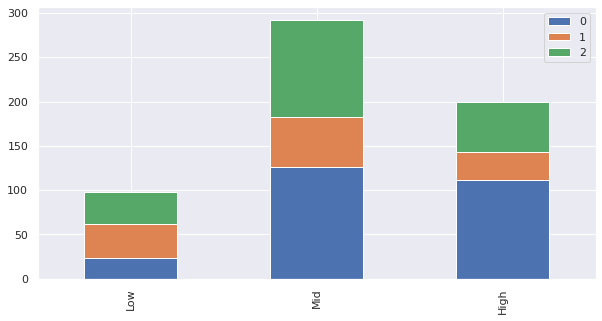

In [102]:
bar_chart('Player_of_match_type')

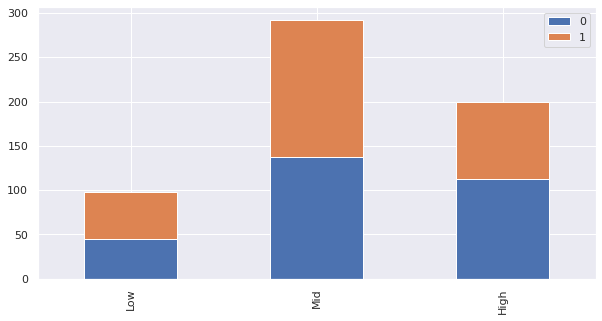

In [103]:
bar_chart('Toss_result')

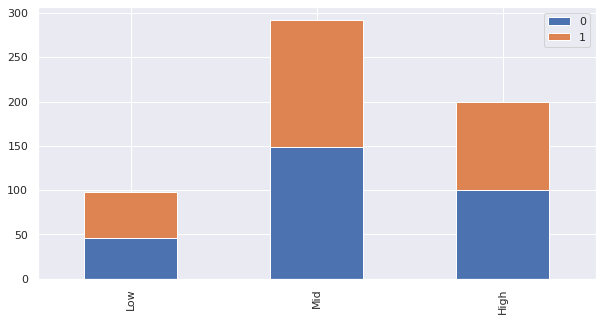

In [104]:
bar_chart('Toss_decission')

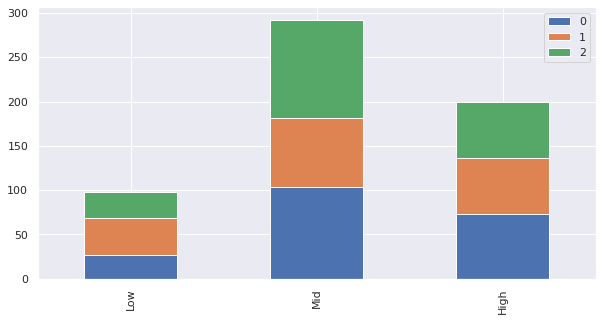

In [105]:
bar_chart('Weather')

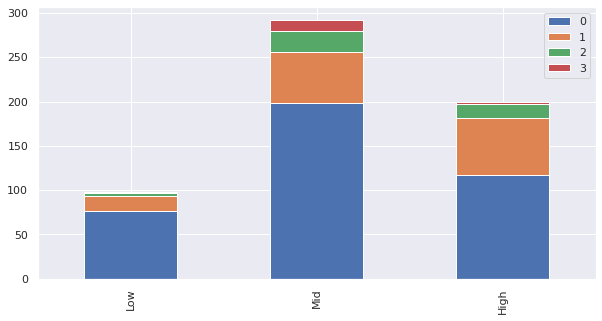

In [106]:
bar_chart('Ground')

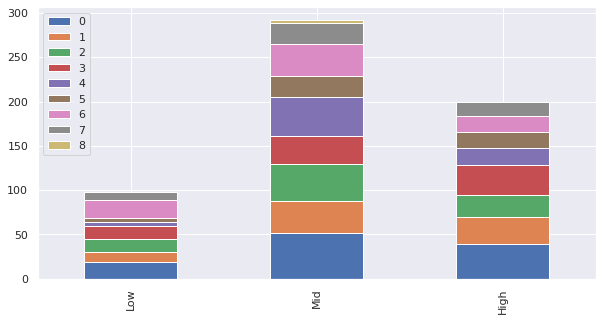

In [107]:
bar_chart('Player_of_match_team')

In [108]:
bpl.head()

,Team,Toss_win,Toss_result,Toss_decission,Player_of_match,Player_of_match_team,Ground,Player_of_match_type,Score,Winner,Result,Weather
0,7,7,1,0,2,7,0,0,2,7,1,1
1,5,7,0,1,2,7,0,0,2,7,0,1
2,1,1,1,1,5,1,0,2,2,1,1,2
3,2,1,0,0,5,1,0,2,1,1,0,2
4,0,4,0,1,5,4,0,2,1,4,0,1


In [109]:
bpl['Weather'].value_counts()

2    204
0    204
1    182
Name: Weather, dtype: int64

In [110]:
bpl['Weather'].isnull().sum()

0

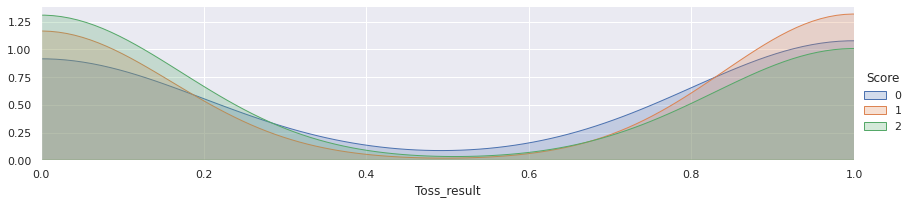

In [111]:
facet = sns.FacetGrid(bpl, hue="Score",aspect=4)
facet.map(sns.kdeplot,'Toss_result',shade= True)
facet.set(xlim=(0, bpl['Toss_result'].max()))
facet.add_legend()
plt.show()

#**Dividing the dataset**

In [112]:
bpl_data = bpl.drop('Result', axis=1)
target = bpl['Result']

bpl_data.shape, target.shape

((590, 11), (590,))

#**Splitting the dataset into train and test data**

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bpl_data, target, test_size=.30, random_state=42)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)
print(y_test)

y_test.value_counts()

X_train:  (413, 11)
X_test:  (177, 11)
y_train:  (413,)
y_test:  (177,)
522    1
284    0
514    1
331    1
210    1
      ..
335    1
589    1
465    1
423    0
305    1
Name: Result, Length: 177, dtype: int64


1    91
0    86
Name: Result, dtype: int64

#**Random Forest Algorithm**

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [115]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[63 23]
 [24 67]]
              precision    recall  f1-score   support

           0       0.72      0.73      0.73        86
           1       0.74      0.74      0.74        91

    accuracy                           0.73       177
   macro avg       0.73      0.73      0.73       177
weighted avg       0.73      0.73      0.73       177



In [116]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7344632768361582


#**Linear Regression**

In [117]:
from sklearn.linear_model import LinearRegression

#**Now we need to initiate our model and train it**

In [118]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
print("The R^2 is: ", linear.score(X_test, y_test))
coeff = linear.coef_
intercept = linear.intercept_

for x in range(len(coeff)):
    print(bpl.columns[x], ': ', coeff[x])
print('The intercept of our slope is: ', intercept)

The R^2 is:  -0.02057710036050775
Team :  -0.0075855776527379995
Toss_win :  0.004608527558688575
Toss_result :  -0.08100882809335973
Toss_decission :  -0.12284641707570734
Player_of_match :  -0.030542086961504292
Player_of_match_team :  0.0009119844027269994
Ground :  -0.017966794477256923
Player_of_match_type :  0.04743636851109819
Score :  0.18124777901128822
Winner :  0.0009119844027269578
Result :  -0.011704406142660185
The intercept of our slope is:  0.5044281049628113


#**K Nearest Neighbour**

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    knn.fit(X_train,y_train.ravel())
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    test_accuracy[i] = knn.score(X_test, y_test.ravel())

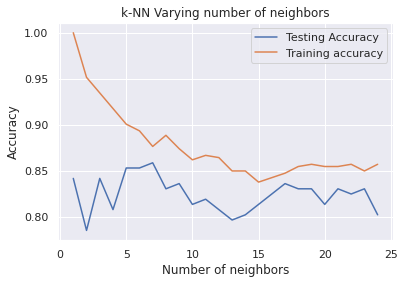

In [122]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [123]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [124]:
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                     weights='uniform')

In [125]:
knn_predicted_test_labels=knn.predict(X_test)

In [126]:
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)

In [127]:
print(knn_accuracy_score)

0.8587570621468926


#**Logistic regression**

In [128]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
y_pred=logmodel.predict(X_test)

In [130]:
print("Accuracy",(logmodel.score(X_test, y_test)))

Accuracy 0.5480225988700564


#**NaiveBayes**

In [131]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [132]:
model = GaussianNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

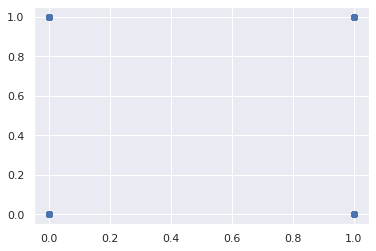

In [133]:

plt.scatter(y_test, prediction)

In [134]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.51      0.63      0.57        86
           1       0.56      0.44      0.49        91

    accuracy                           0.53       177
   macro avg       0.53      0.53      0.53       177
weighted avg       0.54      0.53      0.53       177



In [135]:
metrics.accuracy_score(prediction, y_test)

0.5310734463276836

#**Gradient Boosting Algorithms**

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [137]:
model = GradientBoostingClassifier(n_estimators=100,max_depth=5)

In [138]:
model.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [139]:
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train) 


Target on train data [1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0
 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0
 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0
 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1
 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0
 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1
 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1
 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 1 1 1 1 0 1]


In [140]:
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  1.0


In [141]:
predict_test = model.predict(X_test)
print('\nTarget on test data',predict_test)


Target on test data [1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1
 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1
 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1]


In [142]:
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on test dataset :  0.9378531073446328
